# 프로젝트 : 다양한 OCR모델 비교하기
라이브러리 버전을 살펴보자.

In [1]:
import keras_ocr
import pytesseract

print(keras_ocr.__version__)
print(pytesseract.__version__)
# pytesseract는 tesseract-ocr에 종속적입니다. 아래 명령어를 통해 설치해야 할 수도 있습니다.
# !sudo apt install tesseract-ocr

0.8.8
0.3.8




## 제안

* 휴계소나 박물관, 자연휴양림 등 어느 곳의 지도가 크게 되어 있는 곳에서 사진을 찍어 인식 시키고, 글자가 추출된 위치와 리스트를 저장하여 내가 알고싶은 목적지를 검색 시, 지도에서 그 위치를 찾아주는 시스템

# 검증용 데이터셋 준비

* 제안한 프로그램에 맞게 약도로 준비

In [2]:
import keras_ocr
import pytesseract

print(keras_ocr.__version__)
print(pytesseract.__version__)
# pytesseract는 tesseract-ocr에 종속적입니다. 아래 명령어를 통해 설치해야 할 수도 있습니다.
# !sudo apt install tesseract-ocr

0.8.8
0.3.8


In [3]:
import matplotlib.pyplot as plt
import keras_ocr


pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


* 숫자 뒤에 아무 표시가 없으면 일반 약도 이미지
* 숫자 뒤에 p가 붙은건 보통 사용하는 폰트와는 다른 이미지
* 숫자 뒤에 n이 붙은 건 화질이 조금 안 좋은 이미지
* 숫자 뒤에 nn이 붙은 건 이미지 전체에 노이즈가 낀 이미지
* 숫자 뒤에 a가 붙은 건 기울어진 이미지
* 숫자 뒤에 180이 붙은 건 180도 회전한 이미지

In [4]:
# 테스트에 사용할 이미지 url을 모아 봅니다. 추가로 더 모아볼 수도 있습니다. 
image_path = ['/aiffel/aiffel/ocr_python/test/1.png',
              '/aiffel/aiffel/ocr_python/test/2.png',
              '/aiffel/aiffel/ocr_python/test/3.png',
              '/aiffel/aiffel/ocr_python/test/4_p.png',
              '/aiffel/aiffel/ocr_python/test/5.png',
              '/aiffel/aiffel/ocr_python/test/6.png',
              '/aiffel/aiffel/ocr_python/test/7_p.png',
              '/aiffel/aiffel/ocr_python/test/8_n.png',
              '/aiffel/aiffel/ocr_python/test/9_n.png',
              '/aiffel/aiffel/ocr_python/test/10_n.png',
              '/aiffel/aiffel/ocr_python/test/11.png',
              '/aiffel/aiffel/ocr_python/test/12_a.png',
              '/aiffel/aiffel/ocr_python/test/13_a.png',
              '/aiffel/aiffel/ocr_python/test/14.png',
              '/aiffel/aiffel/ocr_python/test/15_180.png',
              '/aiffel/aiffel/ocr_python/test/16.png',
              '/aiffel/aiffel/ocr_python/test/17_n.jpg',
              '/aiffel/aiffel/ocr_python/test/18_nn.png',
              '/aiffel/aiffel/ocr_python/test/19_n.png',
              '/aiffel/aiffel/ocr_python/test/20_nn.png',
              '/aiffel/aiffel/ocr_python/test/21.png',
             '/aiffel/aiffel/ocr_python/test/22.png']

images = [ keras_ocr.tools.read(im) for im in image_path]
prediction_groups = [pipeline.recognize([im]) for im in image_path]

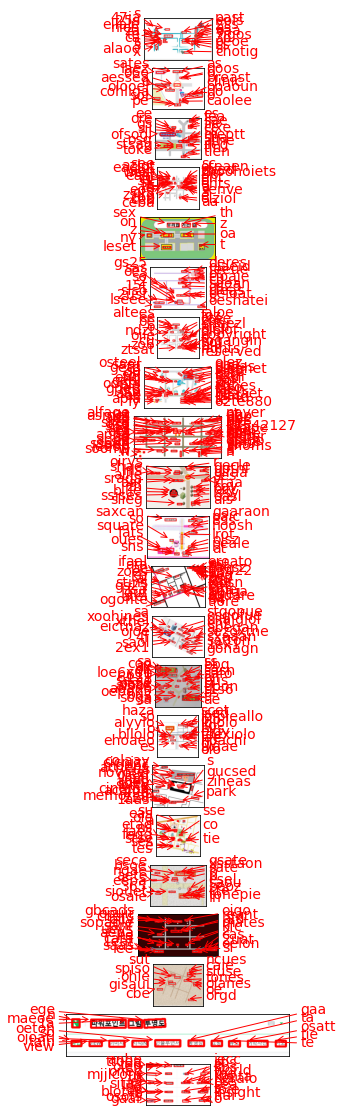

In [5]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

# 테서렉트

In [6]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = os.getenv('HOME')+'/aiffel/ocr_python/test'
img_file_path = work_dir + '/2.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/aiffel/aiffel/ocr_python/test/0000.png
/aiffel/aiffel/ocr_python/test/0001.png
/aiffel/aiffel/ocr_python/test/0002.png
/aiffel/aiffel/ocr_python/test/0003.png
/aiffel/aiffel/ocr_python/test/0004.png
/aiffel/aiffel/ocr_python/test/0005.png
/aiffel/aiffel/ocr_python/test/0006.png
/aiffel/aiffel/ocr_python/test/0007.png
/aiffel/aiffel/ocr_python/test/0008.png
/aiffel/aiffel/ocr_python/test/0009.png
/aiffel/aiffel/ocr_python/test/0010.png
/aiffel/aiffel/ocr_python/test/0011.png
/aiffel/aiffel/ocr_python/test/0012.png
/aiffel/aiffel/ocr_python/test/0013.png
/aiffel/aiffel/ocr_python/test/0014.png
/aiffel/aiffel/ocr_python/test/0015.png
/aiffel/aiffel/ocr_python/test/0016.png
/aiffel/aiffel/ocr_python/test/0017.png
/aiffel/aiffel/ocr_python/test/0018.png


In [7]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

At /De

A=

|

( )

O\=

a

Se


__

SA(Sonssic =)

@

oMeoreal

oy

Gus


.


An eh ts Bo}

aol +e

Done


In [8]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = os.getenv('HOME')+'/aiffel/ocr_python/test'
img_file_path = work_dir + '/14.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/aiffel/aiffel/ocr_python/test/0000.png
/aiffel/aiffel/ocr_python/test/0001.png
/aiffel/aiffel/ocr_python/test/0002.png
/aiffel/aiffel/ocr_python/test/0003.png
/aiffel/aiffel/ocr_python/test/0004.png
/aiffel/aiffel/ocr_python/test/0005.png
/aiffel/aiffel/ocr_python/test/0006.png
/aiffel/aiffel/ocr_python/test/0007.png
/aiffel/aiffel/ocr_python/test/0008.png
/aiffel/aiffel/ocr_python/test/0009.png
/aiffel/aiffel/ocr_python/test/0010.png
/aiffel/aiffel/ocr_python/test/0011.png


In [9]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

4

-=

HII

nts

S101

S710

Sat

“a

= .

Qa

Li D}Ol-rd

cy |

Done


In [10]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = os.getenv('HOME')+'/aiffel/ocr_python/test'
img_file_path = work_dir + '/22.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/aiffel/aiffel/ocr_python/test/0000.png
/aiffel/aiffel/ocr_python/test/0001.png
/aiffel/aiffel/ocr_python/test/0002.png
/aiffel/aiffel/ocr_python/test/0003.png
/aiffel/aiffel/ocr_python/test/0004.png
/aiffel/aiffel/ocr_python/test/0005.png
/aiffel/aiffel/ocr_python/test/0006.png
/aiffel/aiffel/ocr_python/test/0007.png
/aiffel/aiffel/ocr_python/test/0008.png
/aiffel/aiffel/ocr_python/test/0009.png
/aiffel/aiffel/ocr_python/test/0010.png
/aiffel/aiffel/ocr_python/test/0011.png
/aiffel/aiffel/ocr_python/test/0012.png
/aiffel/aiffel/ocr_python/test/0013.png
/aiffel/aiffel/ocr_python/test/0014.png
/aiffel/aiffel/ocr_python/test/0015.png


In [11]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

TAA ES

>

7E95

—_————

[-}] BLOTER

=A & OF

A & FA Kl

ht

oe

=|

The

Korea

eral

BAtrois

4B oj A ya x4

*

Done


# Google OCR API

In [12]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [13]:
# 로컬 환경에서는 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
# 클라우드 환경에서는 무시해도 좋습니다
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/lustrous-aleph-342301-638102fc7c30.json'

path = ['/aiffel/aiffel/ocr_python/test/1.png',
              '/aiffel/aiffel/ocr_python/test/2.png',
              '/aiffel/aiffel/ocr_python/test/3.png',
              '/aiffel/aiffel/ocr_python/test/4_p.png',
              '/aiffel/aiffel/ocr_python/test/5.png',
              '/aiffel/aiffel/ocr_python/test/6.png',
              '/aiffel/aiffel/ocr_python/test/7_p.png',
              '/aiffel/aiffel/ocr_python/test/8_n.png',
              '/aiffel/aiffel/ocr_python/test/9_n.png',
              '/aiffel/aiffel/ocr_python/test/10_n.png',
              '/aiffel/aiffel/ocr_python/test/11.png',
              '/aiffel/aiffel/ocr_python/test/12_a.png',
              '/aiffel/aiffel/ocr_python/test/13_a.png',
              '/aiffel/aiffel/ocr_python/test/14.png',
              '/aiffel/aiffel/ocr_python/test/15_180.png',
              '/aiffel/aiffel/ocr_python/test/16.png',
              '/aiffel/aiffel/ocr_python/test/17_n.jpg',
              '/aiffel/aiffel/ocr_python/test/18_nn.png',
              '/aiffel/aiffel/ocr_python/test/19_n.png',
              '/aiffel/aiffel/ocr_python/test/20_nn.png',
             '/aiffel/aiffel/ocr_python/test/21.png',
       '/aiffel/aiffel/ocr_python/test/22.png']
# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
for i in path:
    detect_text(i)

total 180028
-rw-r--r-- 1 root root    25017 Jan 18 12:24 '익스6 힘들다힘들어.ipynb'
drwxr-xr-x 4 root root     4096 Feb  3 17:58  done
-rw-r--r-- 1 root root  3531958 Feb  8 07:20  exploration_10th_basic.ipynb
-rw-r--r-- 1 root root 26914696 Feb 18 06:53  exploration_10th.ipynb
-rw-r--r-- 1 root root   395945 Feb  8 09:41  exploration_10th_test-Copy1.ipynb
-rw-r--r-- 1 root root 17132083 Feb 11 09:16  exploration_10th_testing-Copy1.ipynb
-rw-r--r-- 1 root root 21320688 Feb 12 11:38  exploration_10th_testing-Copy2.ipynb
-rw-r--r-- 1 root root 26914709 Feb 18 07:04  exploration_10th_testing.ipynb
-rw-r--r-- 1 root root   410038 Feb  8 09:41  exploration_10th_test.ipynb
-rw-r--r-- 1 root root  1828677 Feb 10 07:34  exploration_11st_basic.ipynb
-rw-r--r-- 1 root root   743935 Feb 14 05:44  exploration_11st.ipynb
-rw-r--r-- 1 root root   337441 Feb 10 08:06  exploration_11st_test-Copy1.ipynb
-rw-r--r-- 1 root root    69468 Feb 15 08:55  exploration_12.ipynb
-rw-r--r-- 1 root root   968121 Feb 17 1

PermissionDenied: 403 This API method requires billing to be enabled. Please enable billing on project #877935985412 by visiting https://console.developers.google.com/billing/enable?project=877935985412 then retry. If you enabled billing for this project recently, wait a few minutes for the action to propagate to our systems and retry. [links {
  description: "Google developers console billing"
  url: "https://console.developers.google.com/billing/enable?project=877935985412"
}
, reason: "BILLING_DISABLED"
domain: "googleapis.com"
metadata {
  key: "consumer"
  value: "projects/877935985412"
}
metadata {
  key: "service"
  value: "vision.googleapis.com"
}
]

# <결론 및 회고>
* 케라스의 경우 한글이 지원 안 된다는 것을 알고 있었고, 문자들에 박스가 잘 쳐지는 지를 확인하고 싶었는데, 문자에 대한 인식은 영어가 아니어도 잘 이루어진 다는 것을 알 수 있었다.
* 또한, 폰트가 일반적으로 사용하는 것과는 조금 다르고, 노이즈가 끼고, 기울어져 있고 180도 회전 되어 있어도 문자 자체는 잘 인식하는 것을 알 수 있다.
* 테서렉스는 한글이 인식되리라는 믿음을 가지고 시행했지만 한글을 잘 인식하지 못했다.
* 구글 OCR카드를 등록하지 않아서 값이 제대로 나오지는 않았지만, 케라스와 테서렉스와는 달리 문자들이 잘 출력되지 않았을까 싶다.